# Teacher dashboard

In [1]:
import numpy as np
import pandas as pd
from pandas import read_excel

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# data source
# survey result  
df_teacher = read_excel('Student Survey - July.xlsx', sheet_name='responses')
# students attributes
df2_teacher = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
# inner merge on participant ID
temp_teacher_source = pd.merge(df_teacher, df2_teacher, on=['Participant-ID'])


# data cleaning
# hard-code a house
hard_coded_house = 'Vanguard'
# select only 'completed'
df3_teacher = temp_teacher_source[(temp_teacher_source['Status'].isin(['completed'])) & (temp_teacher_source['House'] == hard_coded_house)]

# Landing page

## 1. survey completion rate

In [3]:
print('Percentage of non-completion = ', round((len(temp_teacher_source[temp_teacher_source['House'] == hard_coded_house]) - len(temp_teacher_source[(temp_teacher_source['Status'] == 'completed') & (temp_teacher_source['House'] == hard_coded_house)]))/len(temp_teacher_source) * 100, 2), '%')

Percentage of non-completion =  3.45 %


### 1.1 students list for teacher to follow up

In [4]:
teacher_house_survey_noncomplete = temp_teacher_source[['Participant-ID', 'First-Name', 'Last-Name', 'Email', 'Contact Number', 'Status']][(temp_teacher_source['Status'].isin(['in progress', 'invited'])) & (temp_teacher_source['House'] == hard_coded_house)]

# 'Alert' dashboard

## 1.K6 score

### 1.1a student with abnormal score

In [5]:
teacher_k6_abnormal = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'k6_overall']][(df3_teacher['k6_overall'] >= 20)]

### 1.1b student with borderline score

In [6]:
teacher_k6_borderline = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'k6_overall']][(df3_teacher['k6_overall'] >= 16) & (df3_teacher['k6_overall'] < 20)]

#### 1.1.1 For each student in the list of 2.1 and 2.2, show their network relationships

In [7]:
sna_cat = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']
teacher_studentID = df3_teacher['Participant-ID']

teacher_sna_cat = sna_cat[2] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[1] # user select a student

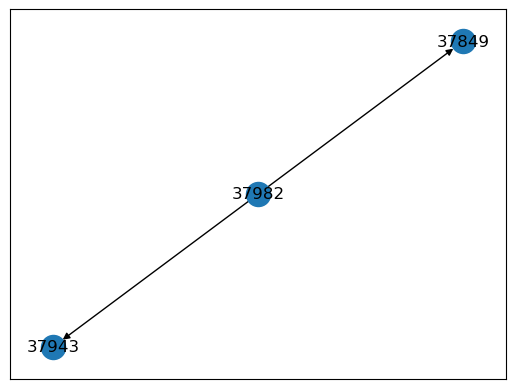

In [8]:
teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 2. Disrespectful

In [9]:
teacher_sna_disrespectful = read_excel('Student Survey - July.xlsx', sheet_name= 'net_5_Disrespect')
teacher_sna_disrespectful = teacher_sna_disrespectful.rename(columns={'Source': 'Participant-ID', 'Target': 'Target'})
teacher_sna_disrespectful_participant = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
teacher_sna_disrespectful_plot = pd.merge(teacher_sna_disrespectful, teacher_sna_disrespectful_participant, on=['Participant-ID'])
teacher_sna_disrespectful_plot = teacher_sna_disrespectful_plot[['Participant-ID', 'First-Name', 'Last-Name', 'Target']][teacher_sna_disrespectful_plot['House'] == hard_coded_house]

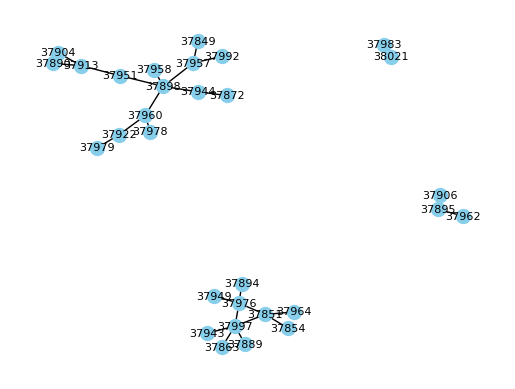

In [10]:
# Create a graph from the data
G = nx.from_pandas_edgelist(teacher_sna_disrespectful_plot, source='Participant-ID', target='Target')

# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}

# Create a figure and axis objects
fig, ax = plt.subplots()

# Draw the graph on the axis
nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='skyblue', font_size=8, ax=ax)

# Show the plot
plt.show()

### 2.1 List of student being disrespected by

In [11]:
victim = teacher_sna_disrespectful_plot[['Participant-ID', 'First-Name', 'Last-Name']]
victim['Participant-ID'].unique()

array([37851, 37922, 37849, 37992, 37958, 37904, 37894, 37951, 37983,
       37978, 37898, 37895, 37976, 37872, 37997, 37890], dtype=int64)

### 2.2 List of student being disrespecful

In [12]:
bully = teacher_sna_disrespectful_plot['Target']
bully.unique()

array([37854, 37964, 37979, 37960, 37957, 37898, 37913, 37976, 38021,
       37951, 37944, 37962, 37906, 37949, 37851, 37889, 37863, 37943,
       37904], dtype=int64)

### 2.3 indvidual student SNA dashboard

In [13]:
sna_cat = ['net_0_Friends', 'net_1_Influential', 'net_2_Feedback', 'net_3_MoreTime', 'net_4_Advice', 'net_5_Disrespect']
teacher_studentID = df3_teacher['Participant-ID']

teacher_sna_cat = sna_cat[4] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[3] # user select a student

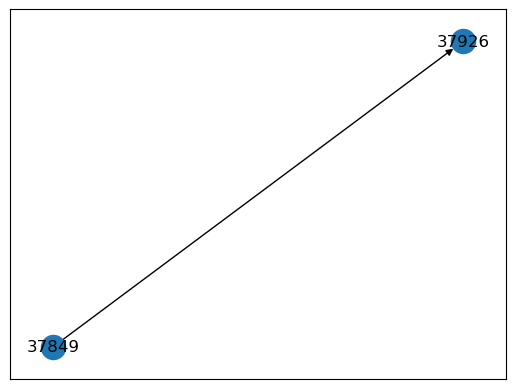

In [14]:
teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

# Student SNA and survey result 

## 1. indvidual student SNA dashboard

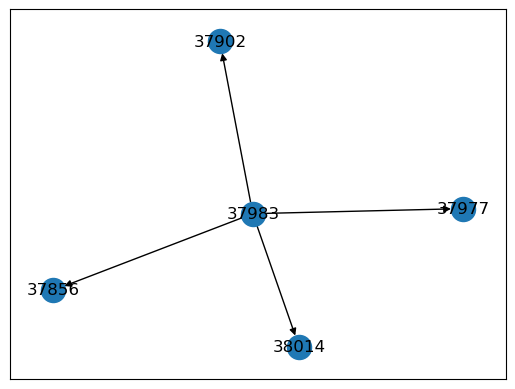

In [15]:
teacher_sna_cat = sna_cat[4] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[14] # user select a student

teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 3 Man box (the top 5%)

In [16]:
# set the threshold
teacher_man_box_threshold = df3_teacher['Manbox5_overall'].quantile(0.95)

In [17]:
teacher_manbox_list = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'CompleteYears', 'Manbox5_overall']][df3_teacher['Manbox5_overall'] >= teacher_man_box_threshold]

#### 3.1 For each student in the list, show their network relationships

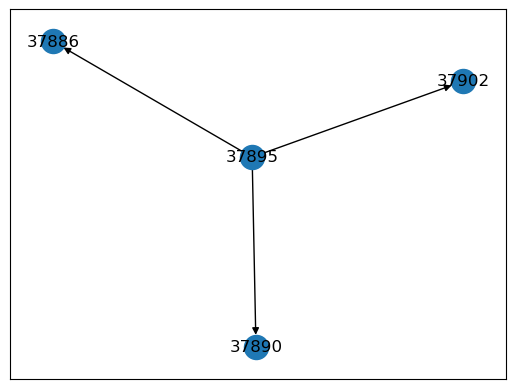

In [18]:
teacher_sna_cat = sna_cat[4] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[17] # user select a student

teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 4 Masculinity measure (the top 5%)

In [19]:
# set the threshold
teacher_masculinity_threshold = df3_teacher['Masculinity_contrained'].quantile(0.95)

In [20]:
teacher_masculinity_list = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'CompleteYears', 'Masculinity_contrained']][df3_teacher['Masculinity_contrained'] >= teacher_masculinity_threshold]

#### 4.1 For each student in the list, show their network relationships

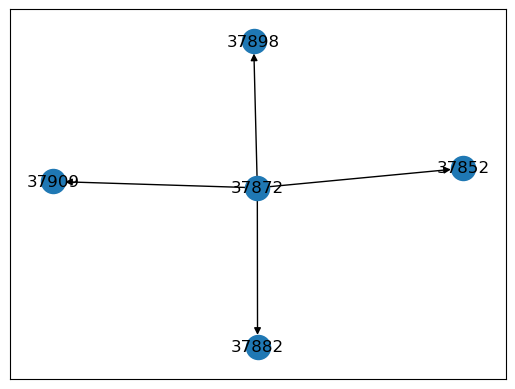

In [21]:
teacher_sna_cat = sna_cat[3] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[18] # user select a student

teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

## 5 School engagment measure (the top 5%)

#### 5.1a The most engage

In [22]:
# set the threshold
teacher_engagment_threshold = df3_teacher['School_support_engage6'].quantile(0.95)

In [23]:
teacher_engagment_threshold_list = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'School_support_engage6']][df3_teacher['School_support_engage6'] >= teacher_engagment_threshold]

#### 5.2 For each student in the list, show their network relationships

In [24]:
teacher_sna_cat = sna_cat[1] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[12] # user select a student

teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

ValueError: cannot convert float NaN to integer

## 6 Learning difficulties (the top 5%)

In [25]:
# set the threshold
teacher_learning_threshold = df3_teacher['GrowthMindset'].quantile(0.95)

In [26]:
teacher_learning_list = df3_teacher[['Participant-ID', 'First-Name', 'Last-Name', 'GrowthMindset']][df3_teacher['GrowthMindset'] >= teacher_learning_threshold]

#### 6.2 For each student in the list, show their network relationships

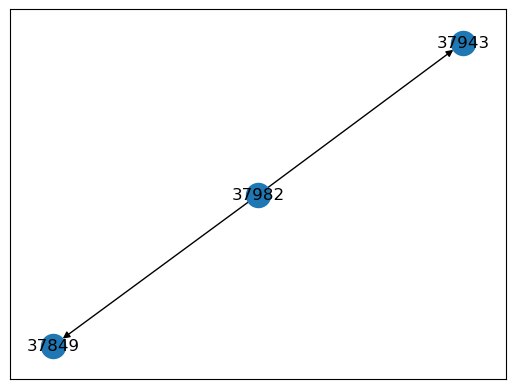

In [27]:
teacher_sna_cat = sna_cat[2] # user select one network to show
teacher_studentID_html = teacher_studentID.iloc[1] # user select a student

teacher_sna_student = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_cat)
teacher_sna_student.drop(teacher_sna_student[teacher_sna_student['Source'] != teacher_studentID_html].index, inplace=True)
np.savetxt(r'network_result.txt', teacher_sna_student.values, fmt='%d')
G = nx.read_edgelist("network_result.txt",create_using=nx.DiGraph())
nx.draw_networkx(G, with_labels=True)

# SNA adjanency matrix

In [28]:
teacher_sna_html = sna_cat[5] # user select a score to view

teacher_sna_cat = read_excel('Student Survey - July.xlsx', sheet_name=teacher_sna_html)
teacher_sna_cat = teacher_sna_cat.rename(columns={'Source': 'Participant-ID', 'Target': 'Target'})
teacher_sna_participant = read_excel('Student Survey - July.xlsx', sheet_name='participantsNov')
teacher_sna_plot = pd.merge(teacher_sna_cat, teacher_sna_participant, on=['Participant-ID'])
teacher_sna_plot = teacher_sna_plot[['Participant-ID', 'Target', 'House']][teacher_sna_plot['House'] == hard_coded_house]

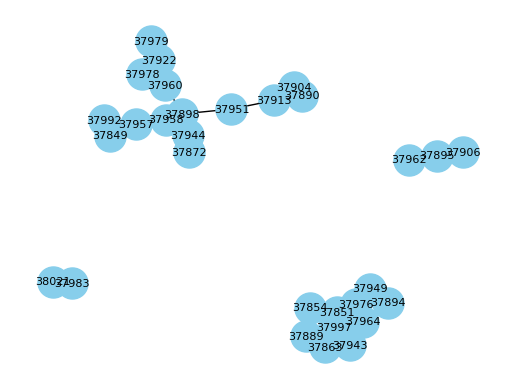

In [29]:
# Create a graph from the data
G = nx.from_pandas_edgelist(teacher_sna_plot, source='Participant-ID', target='Target')

# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}

# Create a figure and axis objects
fig, ax = plt.subplots()

# Draw the graph on the axis
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=8, ax=ax)

# Show the plot
plt.show()